Expt1 - Measure of central tendency(mean,median,mode,quartile,percentile)

In [14]:
import seaborn as sns

df = sns.load_dataset('tips')
col = 'total_bill'

mean_value = df[col].mean()

median_value = df[col].median()

mode_value = df[col].mode()[0]

q1 = df[col].quantile(0.25)
q2 = df[col].quantile(0.50)
q3 = df[col].quantile(0.75)

p10 = df[col].quantile(0.10)
p90 = df[col].quantile(0.90)

print(f"Mean:      {mean_value:.2f}")
print(f"Median:    {median_value:.2f}")
print(f"Mode:      {mode_value:.2f}")
print(f"1st Quartile (25th %ile): {q1:.2f}")
print(f"2nd Quartile (Median):     {q2:.2f}")
print(f"3rd Quartile (75th %ile): {q3:.2f}")
print(f"10th Percentile: {p10:.2f}")
print(f"90th Percentile: {p90:.2f}")

Mean:      19.79
Median:    17.80
Mode:      13.42
1st Quartile (25th %ile): 13.35
2nd Quartile (Median):     17.80
3rd Quartile (75th %ile): 24.13
10th Percentile: 10.34
90th Percentile: 32.24


Expt2 - Measure of variation(range, interquartile range,variance, standard deviation, coefficient of variation)

In [15]:
import seaborn as sns

df = sns.load_dataset('tips')

col = 'total_bill'
x = df[col]

value_range = x.max() - x.min()

iqr = x.quantile(0.75) - x.quantile(0.25)

variance = x.var()

std_dev = x.std()

coef_var = std_dev / x.mean()

print(f"Range:                     {value_range:.2f}")
print(f"IQR (75th – 25th percentile): {iqr:.2f}")
print(f"Variance:                  {variance:.2f}")
print(f"Standard Deviation:        {std_dev:.2f}")
print(f"Coeff. of Variation:       {coef_var:.4f}")

Range:                     47.74
IQR (75th – 25th percentile): 10.78
Variance:                  79.25
Standard Deviation:        8.90
Coeff. of Variation:       0.4499


Expt3 - Data cleaning techniques

In [16]:
import seaborn as sns
import pandas as pd
import numpy as np

# Load the 'tips' dataset
df = sns.load_dataset('tips')

# Manually introduce inconsistencies in the 'sex' column (e.g., 'Male' and 'male' in different cases)
# Convert the 'sex' column to object type temporarily to allow modifications
df['sex'] = df['sex'].astype('object')

# Introducing inconsistencies and missing values
df.loc[0, 'sex'] = 'male'
df.loc[3, 'sex'] = 'Male'
df.loc[5, 'sex'] = 'MAlE'
df.loc[10, 'sex'] = 'female'
df.loc[15, 'sex'] = 'Female'

# Manually introduce missing values (NaNs)
df.loc[2, 'sex'] = np.nan
df.loc[7, 'sex'] = np.nan
df.loc[8, 'total_bill'] = np.nan

print("Data with inconsistencies and missing values in 'sex' column:")
print(df[['sex', 'total_bill']].head(10))

# 1. Handling Missing Values
print("\nChecking for missing values:")
print(df.isnull().sum())

# Handling missing values: In this case, we fill missing values in 'sex' and 'total_bill'
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])  # Fill missing 'sex' with the most frequent value
df['total_bill'] = df['total_bill'].fillna(df['total_bill'].mean())  # Fill missing 'total_bill' with the mean

# 2. Removing Duplicates
print("\nChecking for duplicate rows:")
print(df.duplicated().sum())  # Check if there are any duplicates

df = df.drop_duplicates()  # Remove duplicates if found

# 3. Converting Data Types
print("\nChecking data types:")
print(df.dtypes)

# Convert 'size' to integer type (if it's not already)
df.loc[:, 'size'] = df['size'].astype(int)

# 4. Handling Outliers using IQR (Interquartile Range)
# Calculate the IQR for the 'total_bill' column to detect outliers
Q1 = df['total_bill'].quantile(0.25)
Q3 = df['total_bill'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers: Any values beyond 1.5*IQR from Q1 or Q3 are considered outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['total_bill'] >= lower_bound) & (df['total_bill'] <= upper_bound)]

# 5. Handling Inconsistent Data (Standardizing 'sex' column)
print("\nStandardizing inconsistent 'sex' values:")
df.loc[:, 'sex'] = df['sex'].str.capitalize()  # Capitalize all values to ensure consistency

# Final cleaned data
print("\nCleaned Data:")
print(df.head())

# Checking cleaned 'sex' values
print("\nCleaned 'sex' value counts:")
print(df['sex'].value_counts())


Data with inconsistencies and missing values in 'sex' column:
      sex  total_bill
0    male       16.99
1    Male       10.34
2     NaN       21.01
3    Male       23.68
4  Female       24.59
5    MAlE       25.29
6    Male        8.77
7     NaN       26.88
8    Male         NaN
9    Male       14.78

Checking for missing values:
total_bill    1
tip           0
sex           2
smoker        0
day           0
time          0
size          0
dtype: int64

Checking for duplicate rows:
1

Checking data types:
total_bill     float64
tip            float64
sex             object
smoker        category
day           category
time          category
size             int64
dtype: object

Standardizing inconsistent 'sex' values:

Cleaned Data:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01    Male     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun

Expt4  - Skewness and Kurtosis

Skewness: 1.1332
Kurtosis: 1.2185


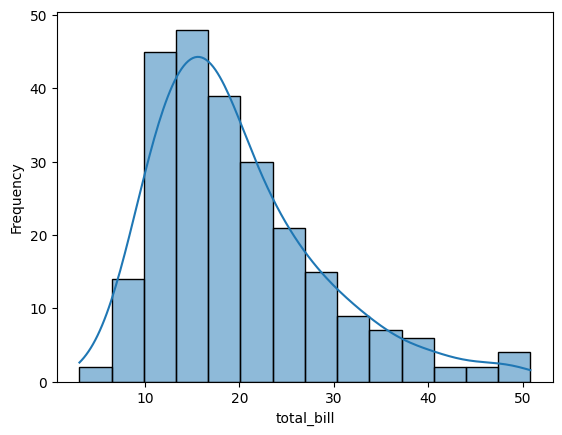

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('tips')

col = 'total_bill'
x = df[col]

skewness = x.skew()
kurt = x.kurtosis()

print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurt:.4f}")

sns.histplot(x, kde=True)
plt.xlabel(col)
plt.ylabel('Frequency')
plt.show()

Expt5 - Karl Pearson's Coeffcient of Skewness

Karl Pearson’s Coefficient of Skewness: 0.6709


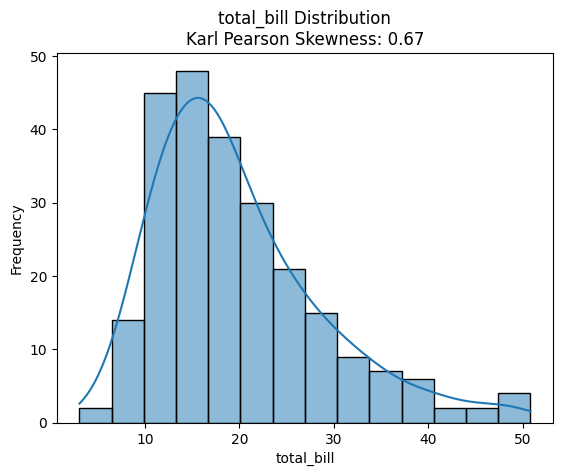

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('tips')
col = 'total_bill'
x = df[col]

mean = x.mean()
median = x.median()
std = x.std()

# Karl Pearson’s Coefficient of Skewness
# Sk = 3 * (mean – median) / std
pearson_skew = 3 * (mean - median) / std

print(f"Karl Pearson’s Coefficient of Skewness: {pearson_skew:.4f}")

sns.histplot(x, kde=True)
plt.title(f'{col} Distribution\nKarl Pearson Skewness: {pearson_skew:.2f}')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.show()

Expt6 - Bowley's coefficient of skewness

Bowley’s Coefficient of Skewness: 0.1749


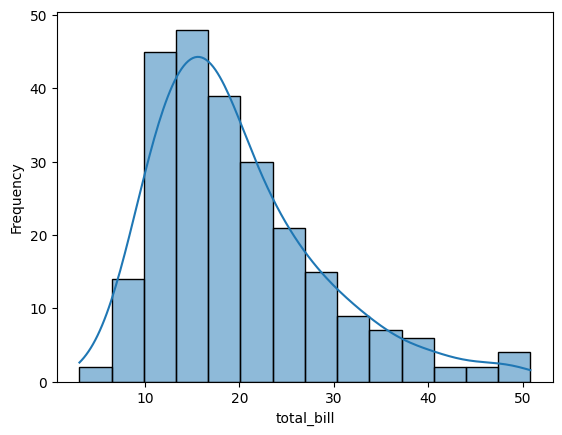

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('tips')
col = 'total_bill'
x = df[col]

Q1 = x.quantile(0.25)
Q2 = x.quantile(0.50)
Q3 = x.quantile(0.75)

# Bowley’s Coefficient of Skewness
# SkB = (Q3 + Q1 - 2*Q2) / (Q3 - Q1)
bowley_skew = (Q3 + Q1 - 2 * Q2) / (Q3 - Q1)

print(f"Bowley’s Coefficient of Skewness: {bowley_skew:.4f}")

# 4. Plot distribution with KDE
sns.histplot(x, kde=True)
plt.xlabel(col)
plt.ylabel('Frequency')
plt.show()

Expt7 - Karl Pearson’s Correlation coefficient

Pearson’s correlation coefficient (pandas): 0.6757
Pearson’s correlation coefficient (manual): 0.6757


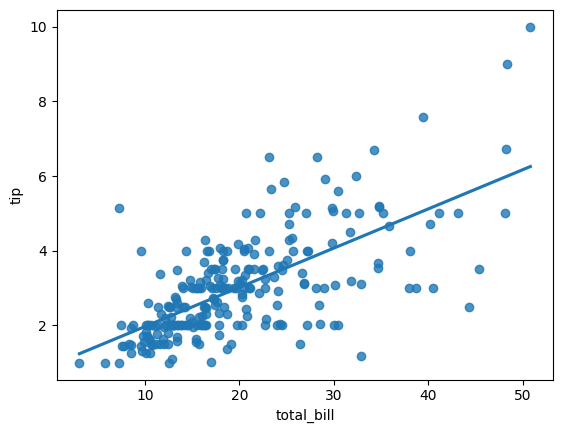

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = sns.load_dataset('tips')
x = df['total_bill']
y = df['tip']

corr = x.corr(y, method='pearson')

N = len(x)
mean_x = x.mean()
mean_y = y.mean()

cov_xy = ((x - mean_x) * (y - mean_y)).sum() / (N - 1)
var_x = ((x - mean_x) ** 2).sum() / (N - 1)
var_y = ((y - mean_y) ** 2).sum() / (N - 1)

r = cov_xy / np.sqrt(var_x * var_y)

print(f"Pearson’s correlation coefficient (pandas): {corr:.4f}")
print(f"Pearson’s correlation coefficient (manual): {r:.4f}")

sns.regplot(x=x, y=y, ci=None)
plt.xlabel('total_bill')
plt.ylabel('tip')
plt.show()

Expt8 - Spearman correlation coefficient

Spearman correlation (ρ) between total_bill and tip: 0.6790
Spearman correlation (ρ) computed from formula: 0.6790


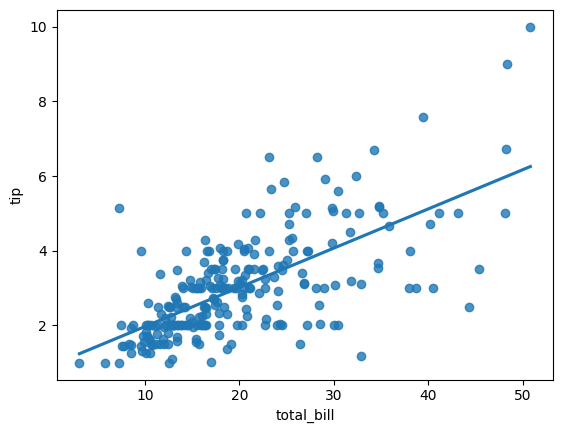

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = sns.load_dataset('tips')
x = df['total_bill']
y = df['tip']

rho = x.corr(y, method='spearman')

print(f"Spearman correlation (ρ) between total_bill and tip: {rho:.4f}")

xr = x.rank()
yr = y.rank()
mean_xr = xr.mean()
mean_yr = yr.mean()
cov_ranks = ((xr - mean_xr) * (yr - mean_yr)).sum() / (len(df) - 1)
var_xr = ((xr - mean_xr) ** 2).sum() / (len(df) - 1)
var_yr = ((yr - mean_yr) ** 2).sum() / (len(df) - 1)

rho = cov_ranks / np.sqrt(var_xr * var_yr)

print(f"Spearman correlation (ρ) computed from formula: {rho:.4f}")

sns.regplot(x=x, y=y, ci=None)
plt.xlabel('total_bill')
plt.ylabel('tip')
plt.show()

Expt9 - Data visualization techniques for numerical variable/categorical
variable/qualitative/quantitative data

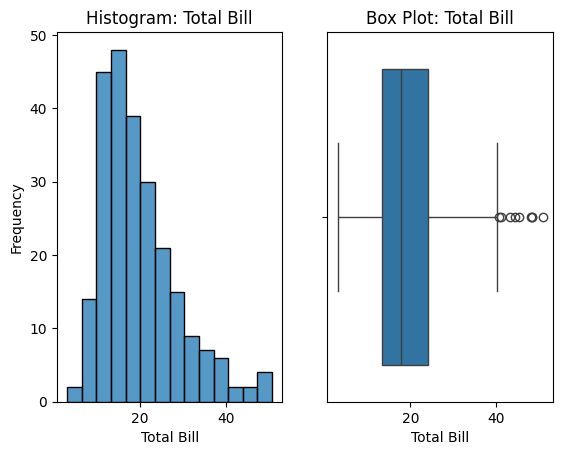

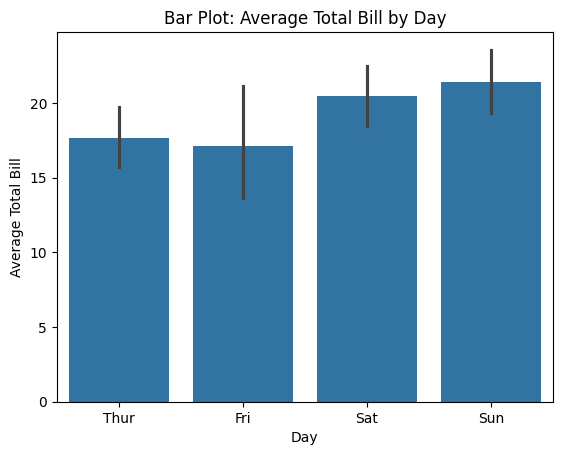

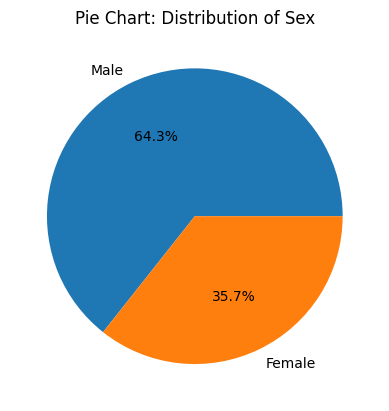

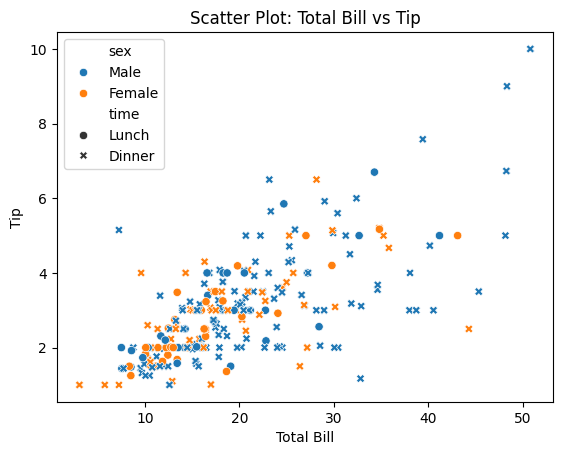

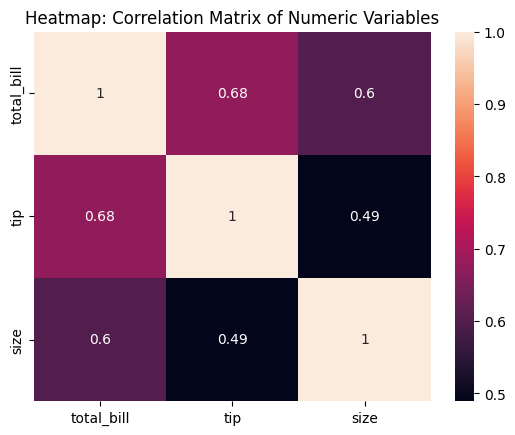

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = sns.load_dataset('tips')

# 1. Numerical Variable - Histogram and Box Plot for 'total_bill'
# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['total_bill'])
plt.title('Histogram: Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')

# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['total_bill'])
plt.title('Box Plot: Total Bill')
plt.xlabel('Total Bill')
plt.show()

# 2. Categorical Variable - Bar Plot for 'day' (categorical data)
sns.barplot(x='day', y='total_bill', data=df, estimator=np.mean)
plt.title('Bar Plot: Average Total Bill by Day')
plt.xlabel('Day')
plt.ylabel('Average Total Bill')
plt.show()

# 3. Qualitative Data - Pie Chart for 'sex' (categorical data)
sex_counts = df['sex'].value_counts()
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart: Distribution of Sex')
plt.show()

# 4. Quantitative Data - Scatter Plot and Correlation Heatmap for 'total_bill' vs 'tip'
# Scatter Plot
sns.scatterplot(x='total_bill', y='tip', hue='sex', style='time', data=df)
plt.title('Scatter Plot: Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

# Correlation Heatmap
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True)
plt.title('Heatmap: Correlation Matrix of Numeric Variables')
plt.show()

Expt10 - Data visualization techniques for univariate data

Stem-and-Leaf Plot (for 'total_bill'):
0 | 3 5 7 7 7 7 7 8 8 8 8 8 9 9 9 9 9
1 | 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9
2 | 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 6 6 6 6 7 7 7 7 8 8 8 8 8 9 9 9 9
3 | 0 0 0 0 1 1 1 2 2 2 2 4 4 4 4 4 5 5 8 8 8 9
4 | 0 0 1 3 4 5 8 8 8
5 | 0




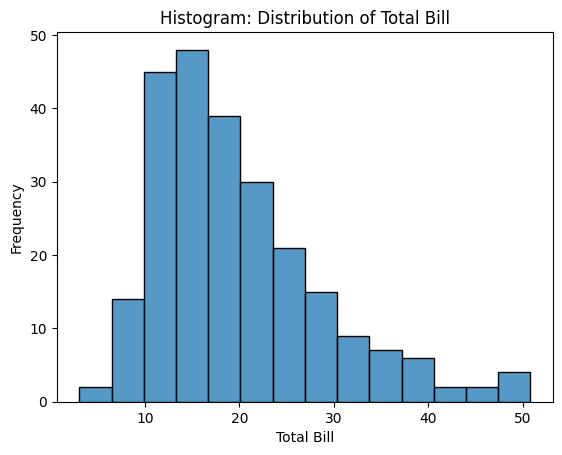

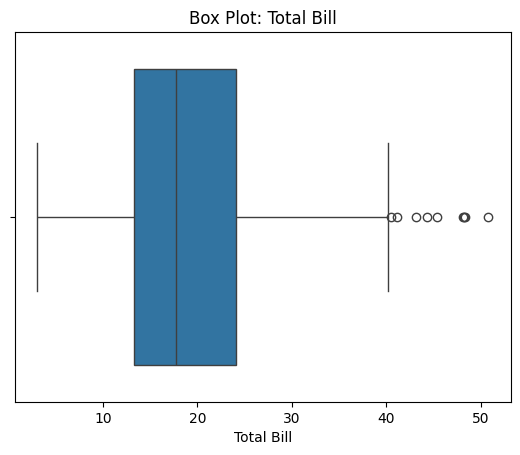

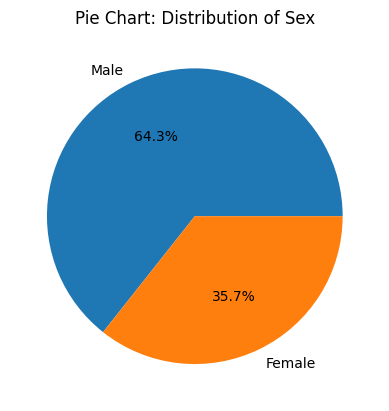

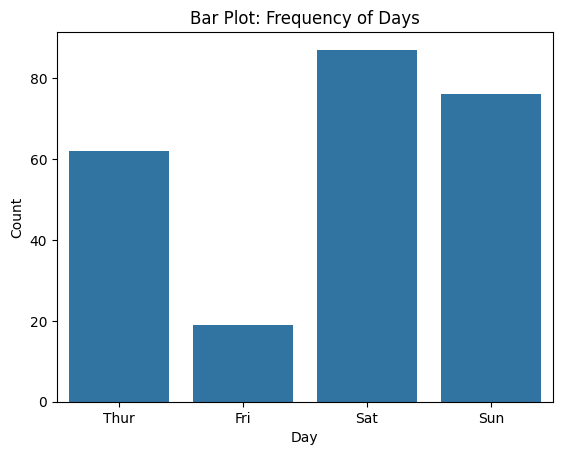

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = sns.load_dataset('tips')

# 1. Stem-and-Leaf Plot (manually created using the 'total_bill' data)
def stem_and_leaf(data):
    sorted_data = sorted(data)
    stems = [int(x // 10) for x in sorted_data]  # Get the tens place
    leaves = [int(x % 10) for x in sorted_data]  # Get the ones place

    stem_leaf_dict = {}
    for s, l in zip(stems, leaves):
        if s not in stem_leaf_dict:
            stem_leaf_dict[s] = []
        stem_leaf_dict[s].append(l)

    # Print stem-and-leaf representation
    for stem, leaves in stem_leaf_dict.items():
        print(f"{stem} | {' '.join(map(str, leaves))}")

print("Stem-and-Leaf Plot (for 'total_bill'):")
stem_and_leaf(df['total_bill'])
print("\n")

# 2. Histogram (for 'total_bill')
sns.histplot(df['total_bill'])
plt.title('Histogram: Distribution of Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.show()

# 3. Box Plot (for 'total_bill')
sns.boxplot(x=df['total_bill'])
plt.title('Box Plot: Total Bill')
plt.xlabel('Total Bill')
plt.show()

# 4.Pie chart
sex_counts = df['sex'].value_counts()
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart: Distribution of Sex')
plt.show()

# 5. Bar Plot (for 'day')
sns.countplot(x='day', data=df)
plt.title('Bar Plot: Frequency of Days')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()

Expt11 - Data visualization techniques for multivariate data

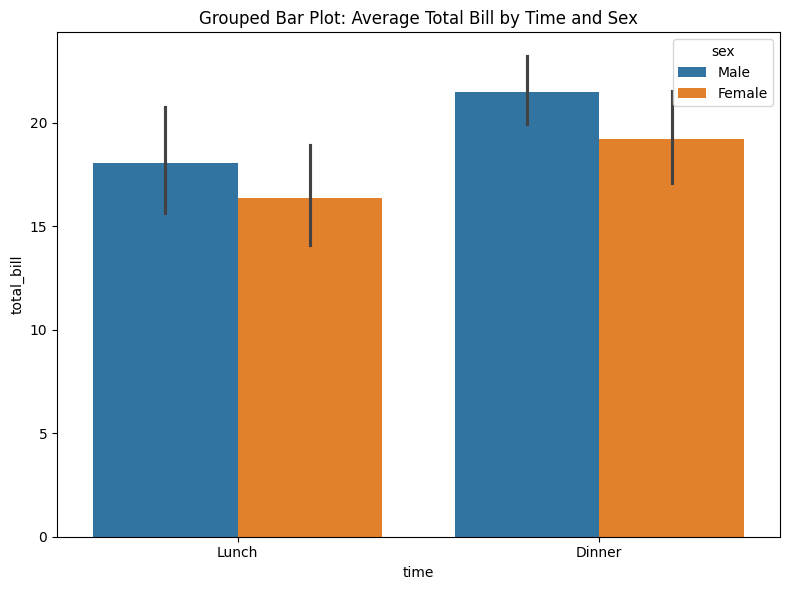

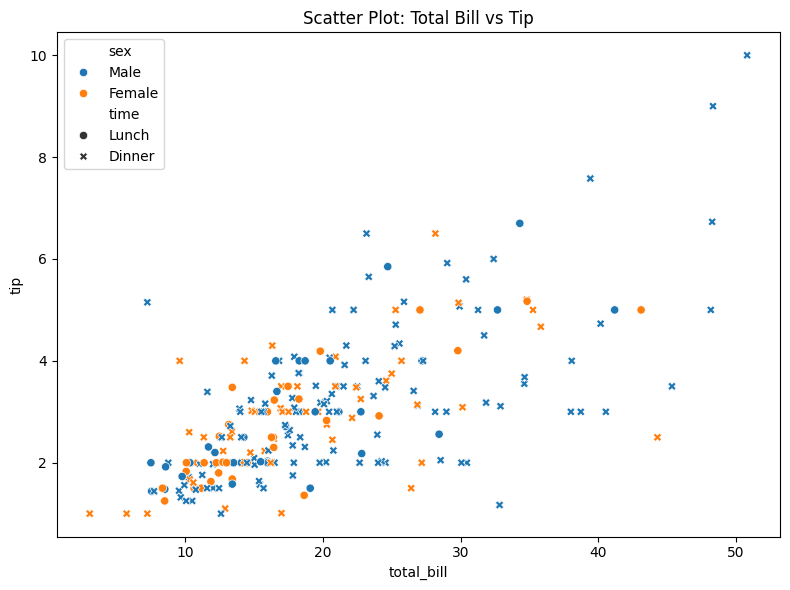

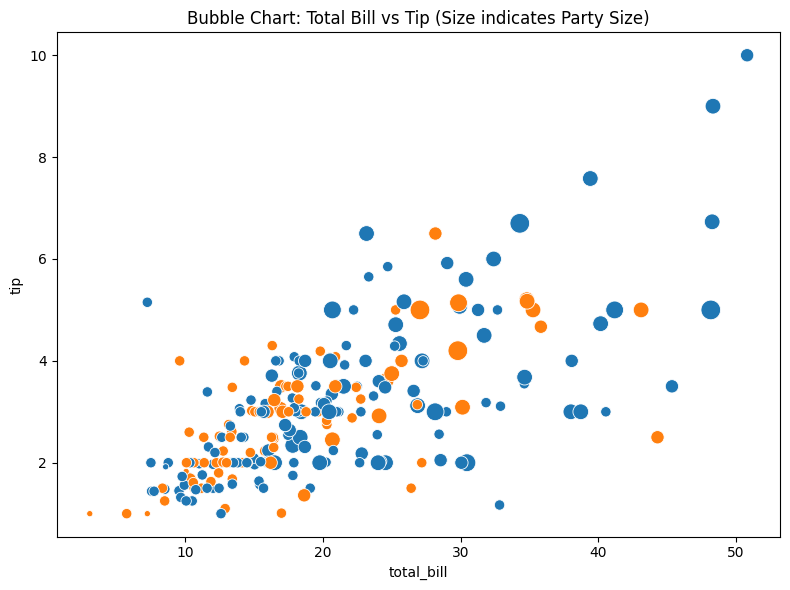

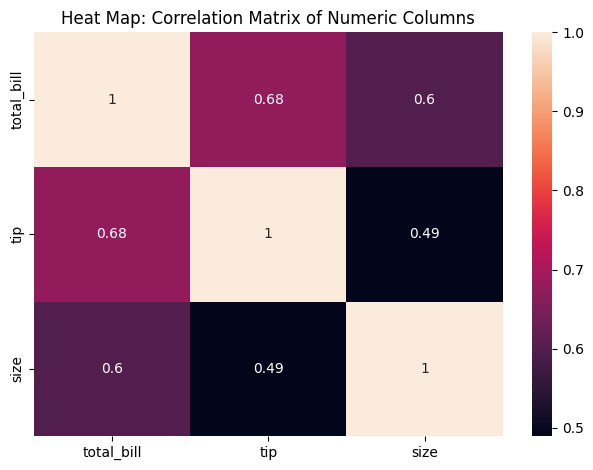

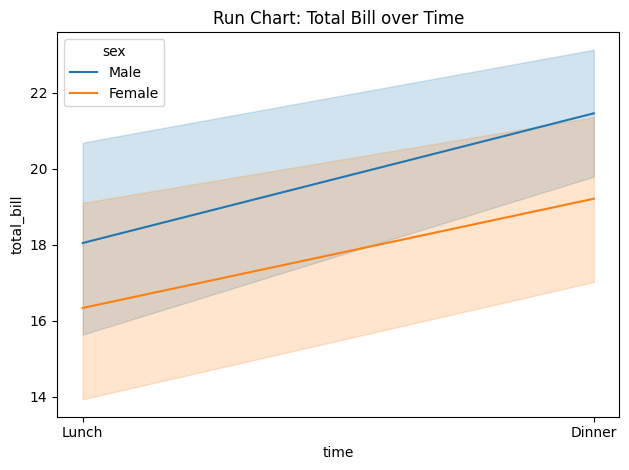

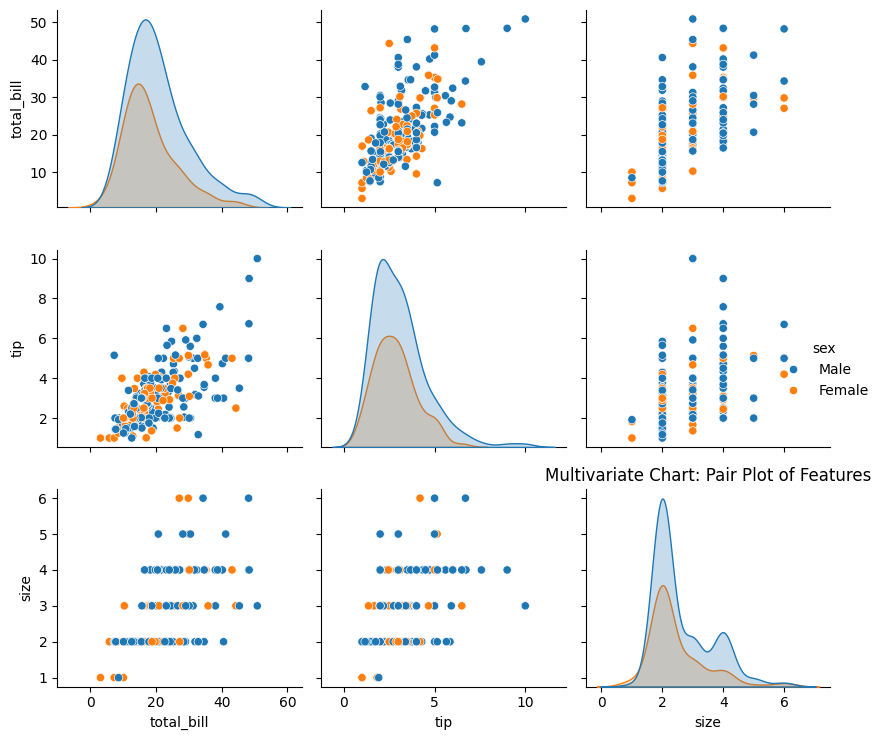

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the 'tips' dataset
df = sns.load_dataset('tips')

# 1. Grouped Bar Plot (Bar plot grouped by 'sex' and 'time' showing average total_bill)
plt.figure(figsize=(8,6))
sns.barplot(x='time', y='total_bill', hue='sex', data=df)
plt.title('Grouped Bar Plot: Average Total Bill by Time and Sex')
plt.tight_layout()
plt.show()

# 2. Scatter Plot (total_bill vs tip, colored by 'sex')
plt.figure(figsize=(8,6))
sns.scatterplot(x='total_bill', y='tip', hue='sex', data=df, style='time')
plt.title('Scatter Plot: Total Bill vs Tip')
plt.tight_layout()
plt.show()

# 3. Bubble Chart (Using 'size' for size variation, 'total_bill' vs 'tip')
plt.figure(figsize=(8,6))
sns.scatterplot(x='total_bill', y='tip', size='size', hue='sex', data=df, legend=False, sizes=(20, 200))
plt.title('Bubble Chart: Total Bill vs Tip (Size indicates Party Size)')
plt.tight_layout()
plt.show()

# 4. Heat Map (Correlation heatmap for numeric columns)
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True)
plt.title('Heat Map: Correlation Matrix of Numeric Columns')
plt.tight_layout()
plt.show()

# 5. Run Chart (total_bill over time - showing trend over time)
sns.lineplot(x='time', y='total_bill', data=df, hue='sex', markers=True)
plt.title('Run Chart: Total Bill over Time')
plt.tight_layout()
plt.show()

# 6. Multivariate Chart (Pair Plot: relationships between multiple variables)
sns.pairplot(df, hue='sex')
plt.title('Multivariate Chart: Pair Plot of Features')
plt.tight_layout()
plt.show()